BL3MiddleThird
============

This was a model including the 4-jaw slit, collimators c1 and C2 and then detectors at the 8m position of the neutron detector. For this model, the y jaws of the slit were set fully open but the x jaws were set at -1 cm and +1 cm leaving a 2 cm openning. Because of the focussing effect of the collimator system, the resulting beam spot is displaced to the positive x side.

At the detector position are a position sensitive detector (psd), a full-coverage wavelength monitor (LMon), and a grid of 9 wavelength monitors with the central row and column being 1 cm wide/tall and the outer blocks 5 cm wide to ensure that they catch all the neutrons in their segment of the detector space.

We start by loading tools and reading in the output of the position sensitive detector.

In [1]:
import sys
sys.path.insert(0, '/Users/bcollett/Research/BL3/NeutronSpectrum/mcstas_local/pytools')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from nspectrum import NSpectrum
from psd import PSDData

Load psd file BL3MidThird/Blackbox.psd
Read 336 lines from BL3MidThird/Blackbox.psd
Line 30 # Data [psd_monitor/Blackbox.psd] I:

Intensity block starts at line 31
Line 31 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Found 101 columns.
End of first block.
Line 131 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Line 132 # Errors [psd_monitor/Blackbox.psd] I_err:

error block starts at line 31
Found 101 rows.
<class 'numpy.ndarray'>
(2, 2)


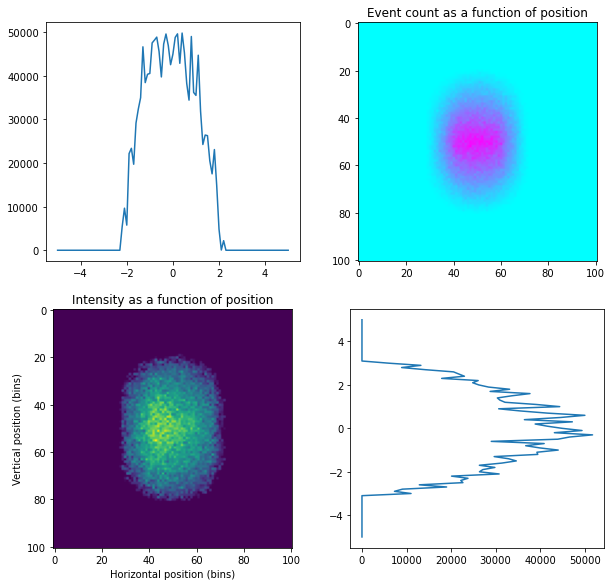

In [3]:
im1 = PSDData('BL3MidThird/Blackbox.psd')
im1.plot()

This time the counts are rather nicely centered.

Next let's look at the overall spectrum.

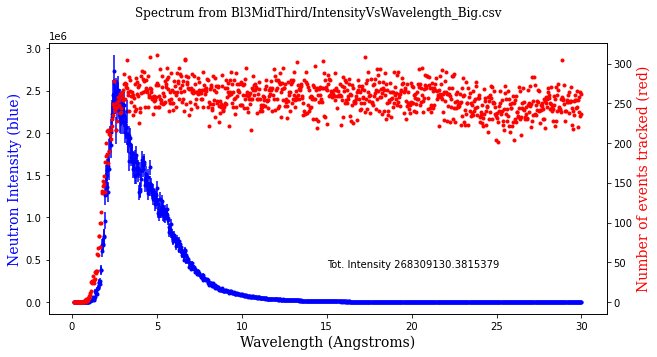

In [4]:
full = NSpectrum('Bl3MidThird/IntensityVsWavelength_Big.csv')
full.plot()

In [5]:
fullC1, fullEC = full.C1()
print(f'Full C1 = {fullC1}+-{fullEC} s')

Full C1 = 4.999691211986461+-0.00024929453052948905 s


That is lower than the C1 for the full beam.

Now we have to read in the 9 individual monitors.

In [6]:
mon = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
for i in range(3):
    for j in range(3):
        print(f'Load LMon{i}{j}csv.dat')
        mon[i][j] = NSpectrum(f'Bl3MidThird/LMon{i}{j}csv.dat')

Load LMon00csv.dat
Load LMon01csv.dat
Load LMon02csv.dat
Load LMon10csv.dat
Load LMon11csv.dat
Load LMon12csv.dat
Load LMon20csv.dat
Load LMon21csv.dat
Load LMon22csv.dat


Now we would like to see what they look like.

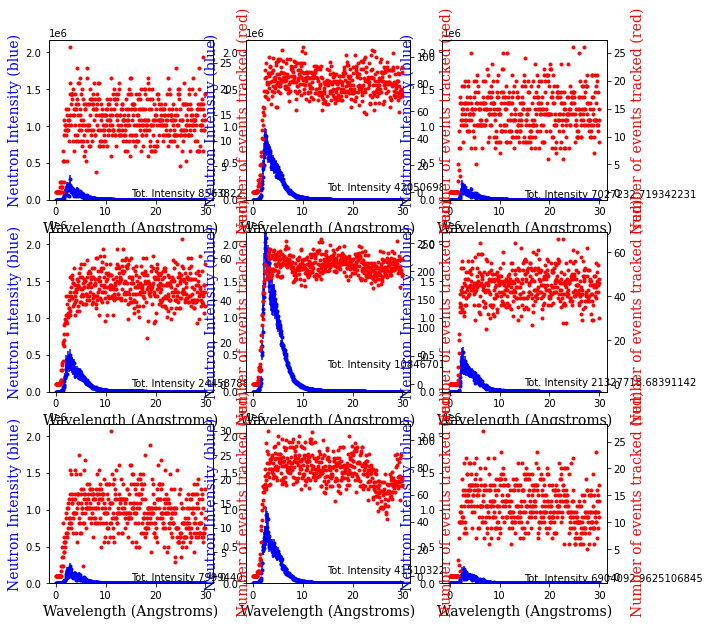

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
max = mon[1][1].max_inten
for i in range(3):
    for j in range(3):
        mon[i][j].plotOn(axes[i][j])
        axes[i][j].set_ylim(bottom=0.0, top=max)
# plt.tight_layout()

Well, it is a trifle messy (overly large font size for labels in part) but it gets the point across. We see that there are fewer counts in the left and right 1/3s of the detection area and that the central 1/3 is about 2x as strong as the upper and lower 2/3 (remember that the central 1/3 either way is 2 cm tall but the outer thirds are 5 cm tall or wide). The central spot ahs more than 200 neutrons per channel while the corners have less tha 1/10 of that. Here the lowest intensity is about 6 million and thus still quite reliable for the purpose of calculating C1.

So what do the C1s look like?

In [8]:
c = np.zeros((3, 3))
e = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        c[i][j], e[i][j] = mon[i][j].C1()
    print(f'{c[i][0]:.4f}+/-{e[i][0]:.4f}     {c[i][1]:.4f}+/-{e[i][1]:.4f}     {c[i][2]:.4f}+/-{e[i][2]:.4f} s')

4.7604+/-0.0015     5.0030+/-0.0007     5.0735+/-0.0016 s
4.9670+/-0.0009     5.0003+/-0.0004     5.0863+/-0.0009 s
4.8874+/-0.0017     5.0157+/-0.0007     5.0342+/-0.0019 s


So the differences are very real, many times the uncertainty. What if we re-do them as differences from the overall value?

In [9]:
for i in range(3):
    print(f'{c[i][0]-fullC1:.4f}+/-{e[i][0]:.4f}     {c[i][1]-fullC1:.4f}+/-{e[i][1]:.4f}     {c[i][2]-fullC1:.4f}+/-{e[i][2]:.4f} s')

-0.2393+/-0.0015     0.0034+/-0.0007     0.0738+/-0.0016 s
-0.0327+/-0.0009     0.0006+/-0.0004     0.0866+/-0.0009 s
-0.1123+/-0.0017     0.0160+/-0.0007     0.0345+/-0.0019 s


So, while all but two of the differences are less than 1 second, they are not much less, especially in the corners.

We can do them in horizontal stripes too.

In [10]:
tl = NSpectrum(clone=mon[0][0])
tm = NSpectrum(clone=mon[0][1])
tr = NSpectrum(clone=mon[0][2])
top = tl.plus(tm.plus(tr))

itot=49077931.34910929 imax=1084065.4781
ctot=45112.0 imax=120.0
itot=57641753.77464859 imax=1278220.4732
ctot=51908.0 imax=140.0


In [12]:
tlc, tle = tl.C1()
print(f'{tlc:.4f}+/-{tle:.4f}')
tmc, tme = tm.C1()
print(f'{tmc:.4f}+/-{tme:.4f}')
trc, tre = tr.C1()
print(f'{trc:.4f}+/-{tre:.4f}')
tc, te = top.C1()
print(f'{tc:.4f}+/-{te:.4f}')
print(f'Top row Raw C1 = {top._corr.CorrBC(top.data[:, 0], top.data[:, 1])}')

4.7606+/-0.0016
5.0031+/-0.0007
5.0740+/-0.0014
4.9778+/-0.0006
Top row Raw C1 = 4.977885346453538


In [13]:
ml = NSpectrum(clone=mon[1][0])
mm = NSpectrum(clone=mon[1][1])
mr = NSpectrum(clone=mon[1][2])
mmid = ml.plus(mm.plus(mr))
print(f'Middle row raw C1 = {mmid._corr.CorrBC(mmid.data[:, 0], mmid.data[:, 1])}')
mlc, mle = ml.C1()
print(f'{mlc:.4f}+/-{mle:.4f}')
mmc, mme = mm.C1()
print(f'{mmc:.4f}+/-{mme:.4f}')
mrc, mre = mr.C1()
print(f'{mrc:.4f}+/-{mre:.4f}')
mc, me = mmid.C1()
print(f'{mc:.4f}+/-{me:.4f}')

itot=129794732.73576869 imax=2561544.6475
ctot=120210.0 imax=308.0
itot=154253521.1547809 imax=3030895.6097
ctot=141938.0 imax=363.0
Middle row raw C1 = 5.007298340084808
4.9671+/-0.0009
5.0003+/-0.0004
5.0862+/-0.0009
5.0073+/-0.0003


In [14]:
bl = NSpectrum(clone=mon[2][0])
bm = NSpectrum(clone=mon[2][1])
br = NSpectrum(clone=mon[2][2])
bot = bl.plus(bm.plus(br))
print(f'Bottome row raw C1 = {bot._corr.CorrBC(bot.data[:, 0], bot.data[:, 1])}')
bc, be = bot.C1()
print(f'{bc:.4f}+/-{be:.4f}')

itot=48414415.36657524 imax=1077386.7907
ctot=42774.0 imax=121.0
itot=56413855.44884059 imax=1233134.1135
ctot=49224.0 imax=138.0
Bottome row raw C1 = 5.000454337820636
5.0004+/-0.0005


So again, we have small differences between the three values suggesting that we can count only the central 2 cm without serious effect on the C1 value.